In [2]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
from music21 import *


In [3]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit



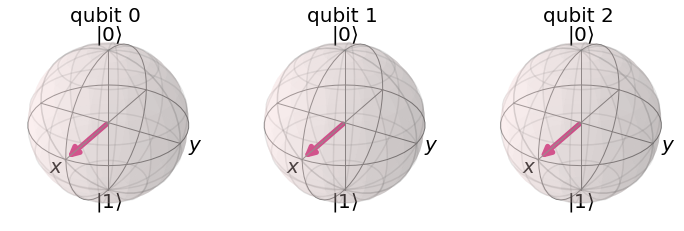

In [4]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
# qc.x(0)
# qc.x(2)
qft(qc,3)
qc.draw("mpl")
qobj = assemble(qc)
sv_sim = Aer.get_backend("statevector_simulator")
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

# qc.measure_all()
# qasm_sim = Aer.get_backend('qasm_simulator')
# shots = 256
# t_qc = transpile(qc, qasm_sim)
# qobj = assemble(t_qc, shots=shots)
# results = qasm_sim.run(qobj).result()
# answer = results.get_counts()

# plot_histogram(answer)

In [5]:
word = "e"
qc = []
chords = []
for letter in word:
    bit_string = format(ord(letter),"08b")
    # print(bit_string)
    qc.append(QuantumCircuit(8))
    for index, bit in enumerate(bit_string):
        if bit == "1":
            qc[-1].x(index)
    qc[-1].barrier()
    qft(qc[-1],8)
    qc[-1].draw("mpl")
    plt.show()
    for i in range(8):
        qc[-1].h(i)
    qc[-1].measure_all()
    # qc[0].draw("mpl")
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = 2048
    t_qc = transpile(qc[-1], qasm_sim)
    qobj = assemble(t_qc, shots=shots)
    results = qasm_sim.run(qobj).result()
    answer = results.get_counts()
    print(len(answer))
    print(max(answer.values()))

    plot_histogram(answer)
    hist = {}
    for i in answer:
        hist[answer[i]] = int(i,2)

    notes = []
    for i in sorted(hist,reverse=1)[0:3]:
        notes.append(hist[i])

    chords.append(chord.Chord(notes))


58
295


In [7]:
midi_stream = stream.Stream(chords)
midi_stream.write('midi', fp='{}.mid'.format("sound"))

'sound.mid'